# 2.7 Random Forest

## Building Random Forest Algorithm

### 1. Import Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

2024-12-16 17:36:07.076175: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#Create a path to where your data is stored.
path = r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/11-2024 ClimateWins Analysis/02 Data'


In [7]:
dfc = pd.read_csv(os.path.join(path, 'wrangled_full.csv'))

In [9]:
dfp = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [11]:
dfc.shape

(22950, 135)

In [13]:
dfp.shape

(22950, 16)

In [15]:
# Extract the 'DATE' column from dfp
date_column = dfp['DATE']

# Insert the 'DATE' column as the first column in dfc
dfc.insert(0, 'DATE', date_column)

In [17]:
dfc.head()

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101                  7            0.85           1.018   
1  19600102                  6            0.84           1.018   
2  19600103                  8            0.90           1.018   
3  19600104                  3            0.92           1.018   
4  19600105                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   
1              6.1             3.3            10.1  ...                 5.0   
2              8.5             5.1             9.9  ...                 4.1   
3              6.3             3.8            10.6  ...                 2.3   
4              3.0            -0.7             6.0  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 136 columns]

In [19]:
# Reduce your dfataset to the 2010s
dfc2010s = dfc[dfc['DATE'].astype(str).str.contains('^201')] #<-----INSERT YEAR HERE
dfp2010s = dfp[dfp['DATE'].astype(str).str.contains('^201')]

In [21]:
dfc2010s.shape

(3652, 136)

In [23]:
dfc2010s2 = dfc2010s.drop(columns = ['DATE'])
dfp2010s2 = dfp2010s.drop(columns = ['DATE'])

In [25]:
X = dfc2010s2
y = dfp2010s2

In [27]:
X.shape

(3652, 135)

In [29]:
y.shape

(3652, 15)

In [31]:
#Use argmax to get rid of on-hot encoding and supply the numerical value.
y = np.argmax(y, axis = 1)
print(y.shape)
y

(3652,)


array([0, 0, 0, ..., 0, 0, 0])

### 2. Split Data

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739,)
(913, 135) (913,)


### 3. Train Random Forest

In [37]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [41]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8806133625410734


In [43]:
stations = ['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'
      ]

[Text(0.3952910469107552, 0.9545454545454546, 'x[17] <= 17.65\ngini = 0.529\nsamples = 1732\nvalue = [1793, 515, 81, 38, 17, 58, 1, 18, 9, 198, 8, 3]\nclass = BASEL'),
 Text(0.14509439359267734, 0.8636363636363636, 'x[87] <= 12.25\ngini = 0.301\nsamples = 791\nvalue = [1060, 0, 19, 9, 6, 26, 0, 13, 7, 133, 6, 0]\nclass = BASEL'),
 Text(0.059496567505720827, 0.7727272727272727, 'x[84] <= 2.79\ngini = 0.036\nsamples = 599\nvalue = [961, 0, 2, 3, 2, 0, 0, 2, 1, 5, 3, 0]\nclass = BASEL'),
 Text(0.05491990846681922, 0.6818181818181818, 'x[41] <= 10.4\ngini = 0.03\nsamples = 596\nvalue = [961, 0, 2, 3, 2, 0, 0, 2, 1, 2, 3, 0]\nclass = BASEL'),
 Text(0.043478260869565216, 0.5909090909090909, 'x[132] <= 10.85\ngini = 0.017\nsamples = 582\nvalue = [944, 0, 1, 0, 0, 0, 0, 1, 1, 2, 3, 0]\nclass = BASEL'),
 Text(0.038901601830663615, 0.5, 'x[26] <= 18.25\ngini = 0.015\nsamples = 581\nvalue = [944, 0, 1, 0, 0, 0, 0, 1, 1, 1, 3, 0]\nclass = BASEL'),
 Text(0.034324942791762014, 0.4090909090909091, 'x

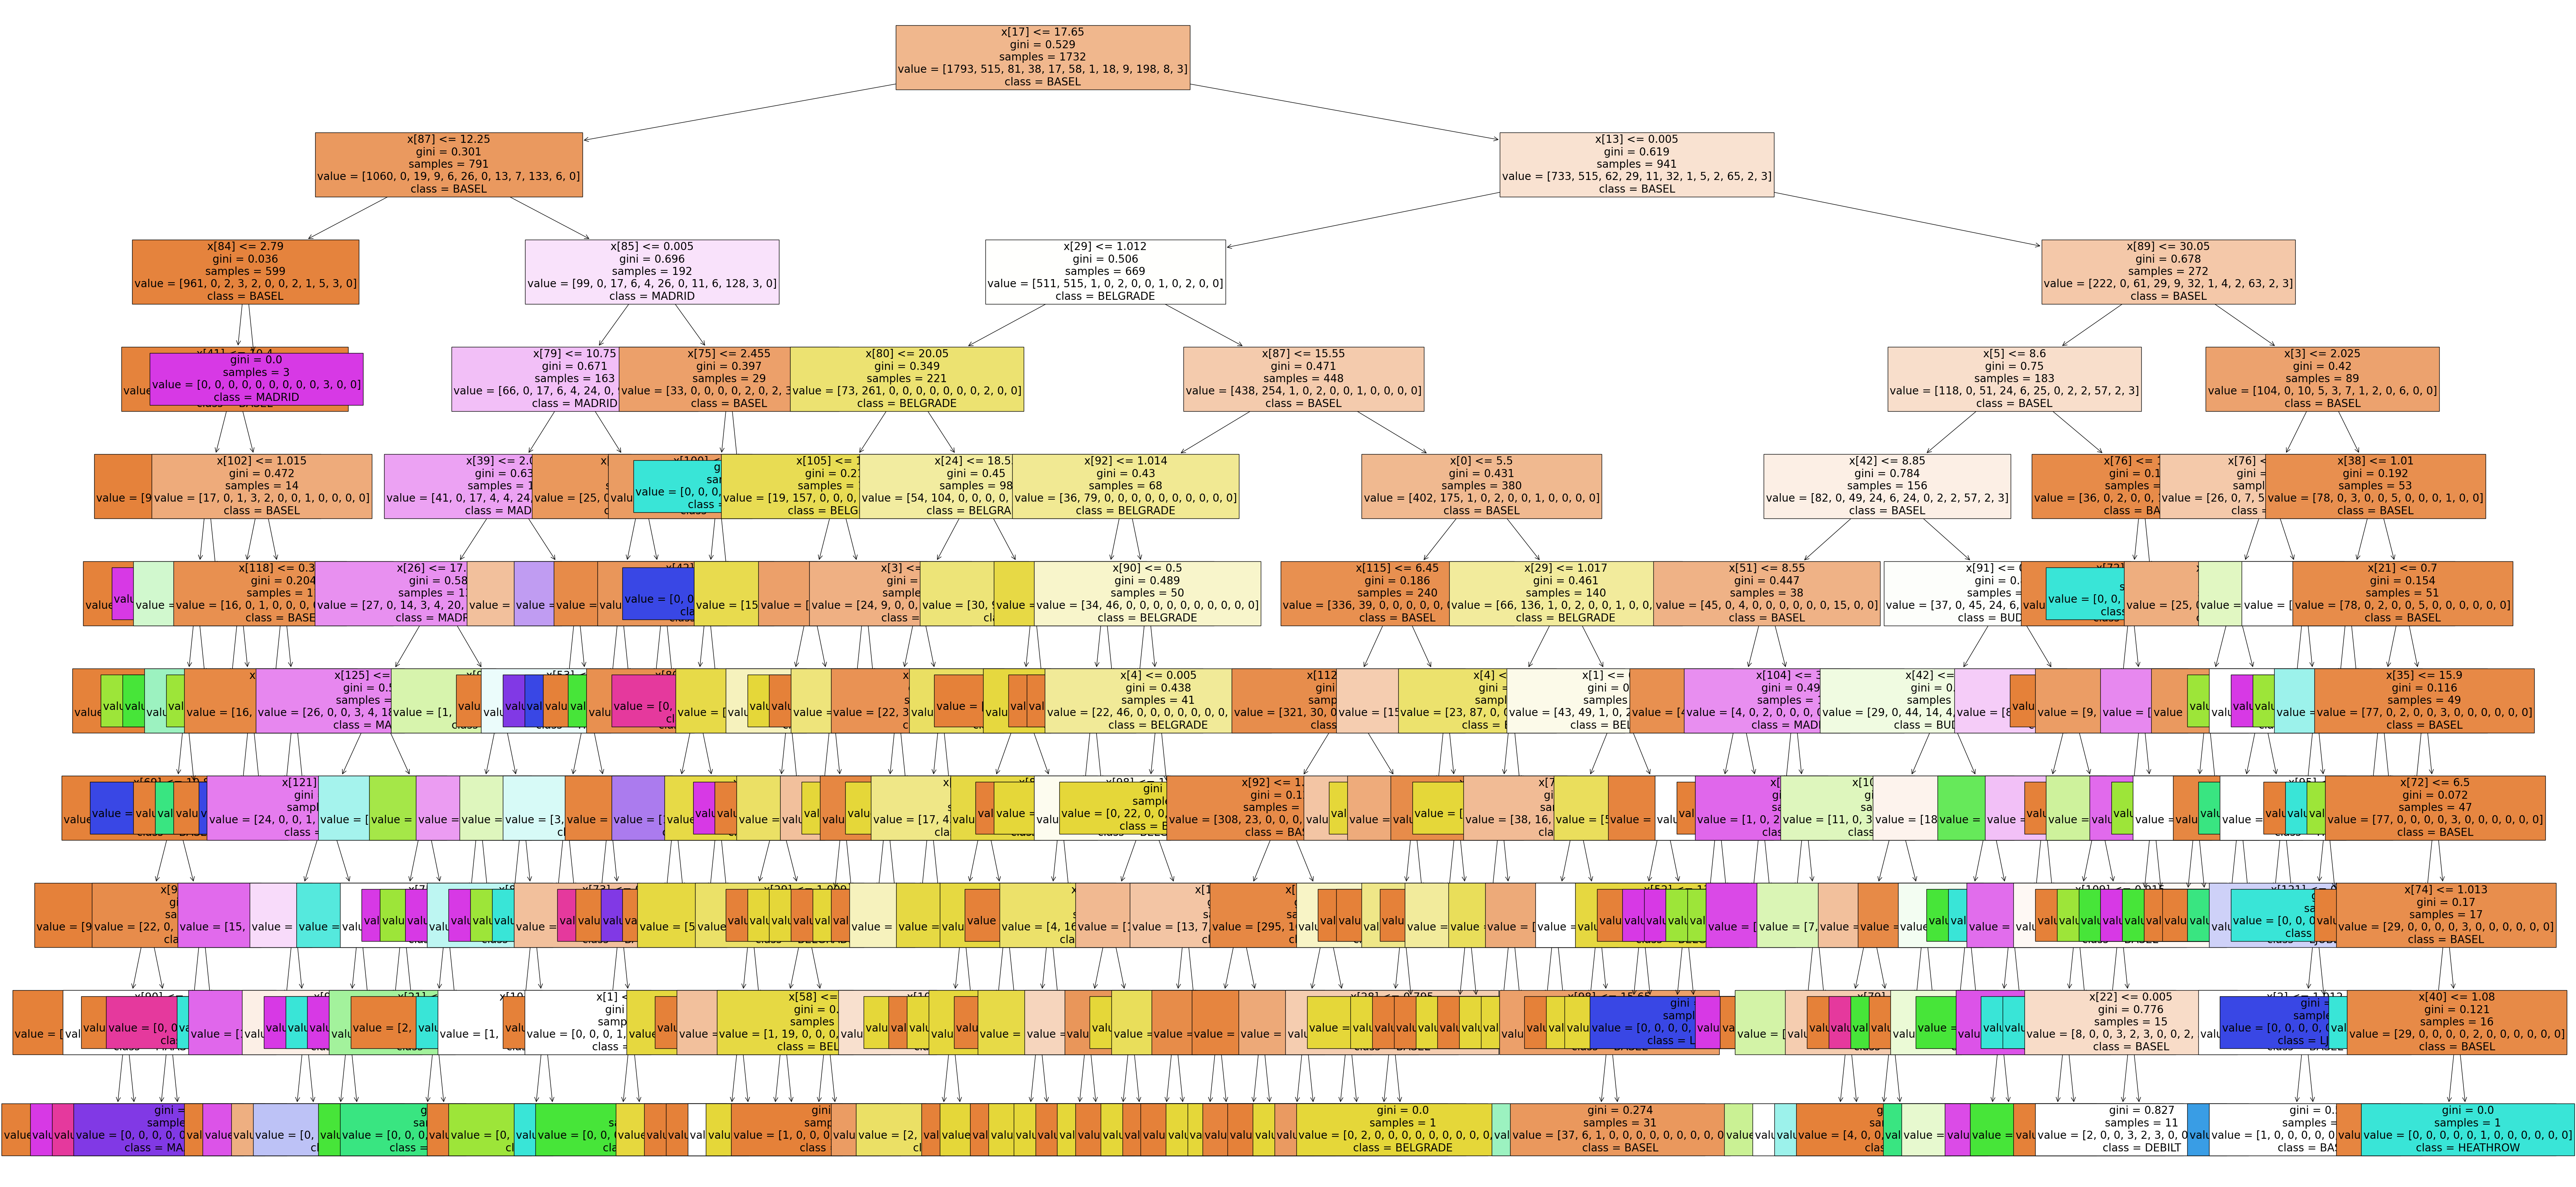

In [45]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=stations, filled=True)

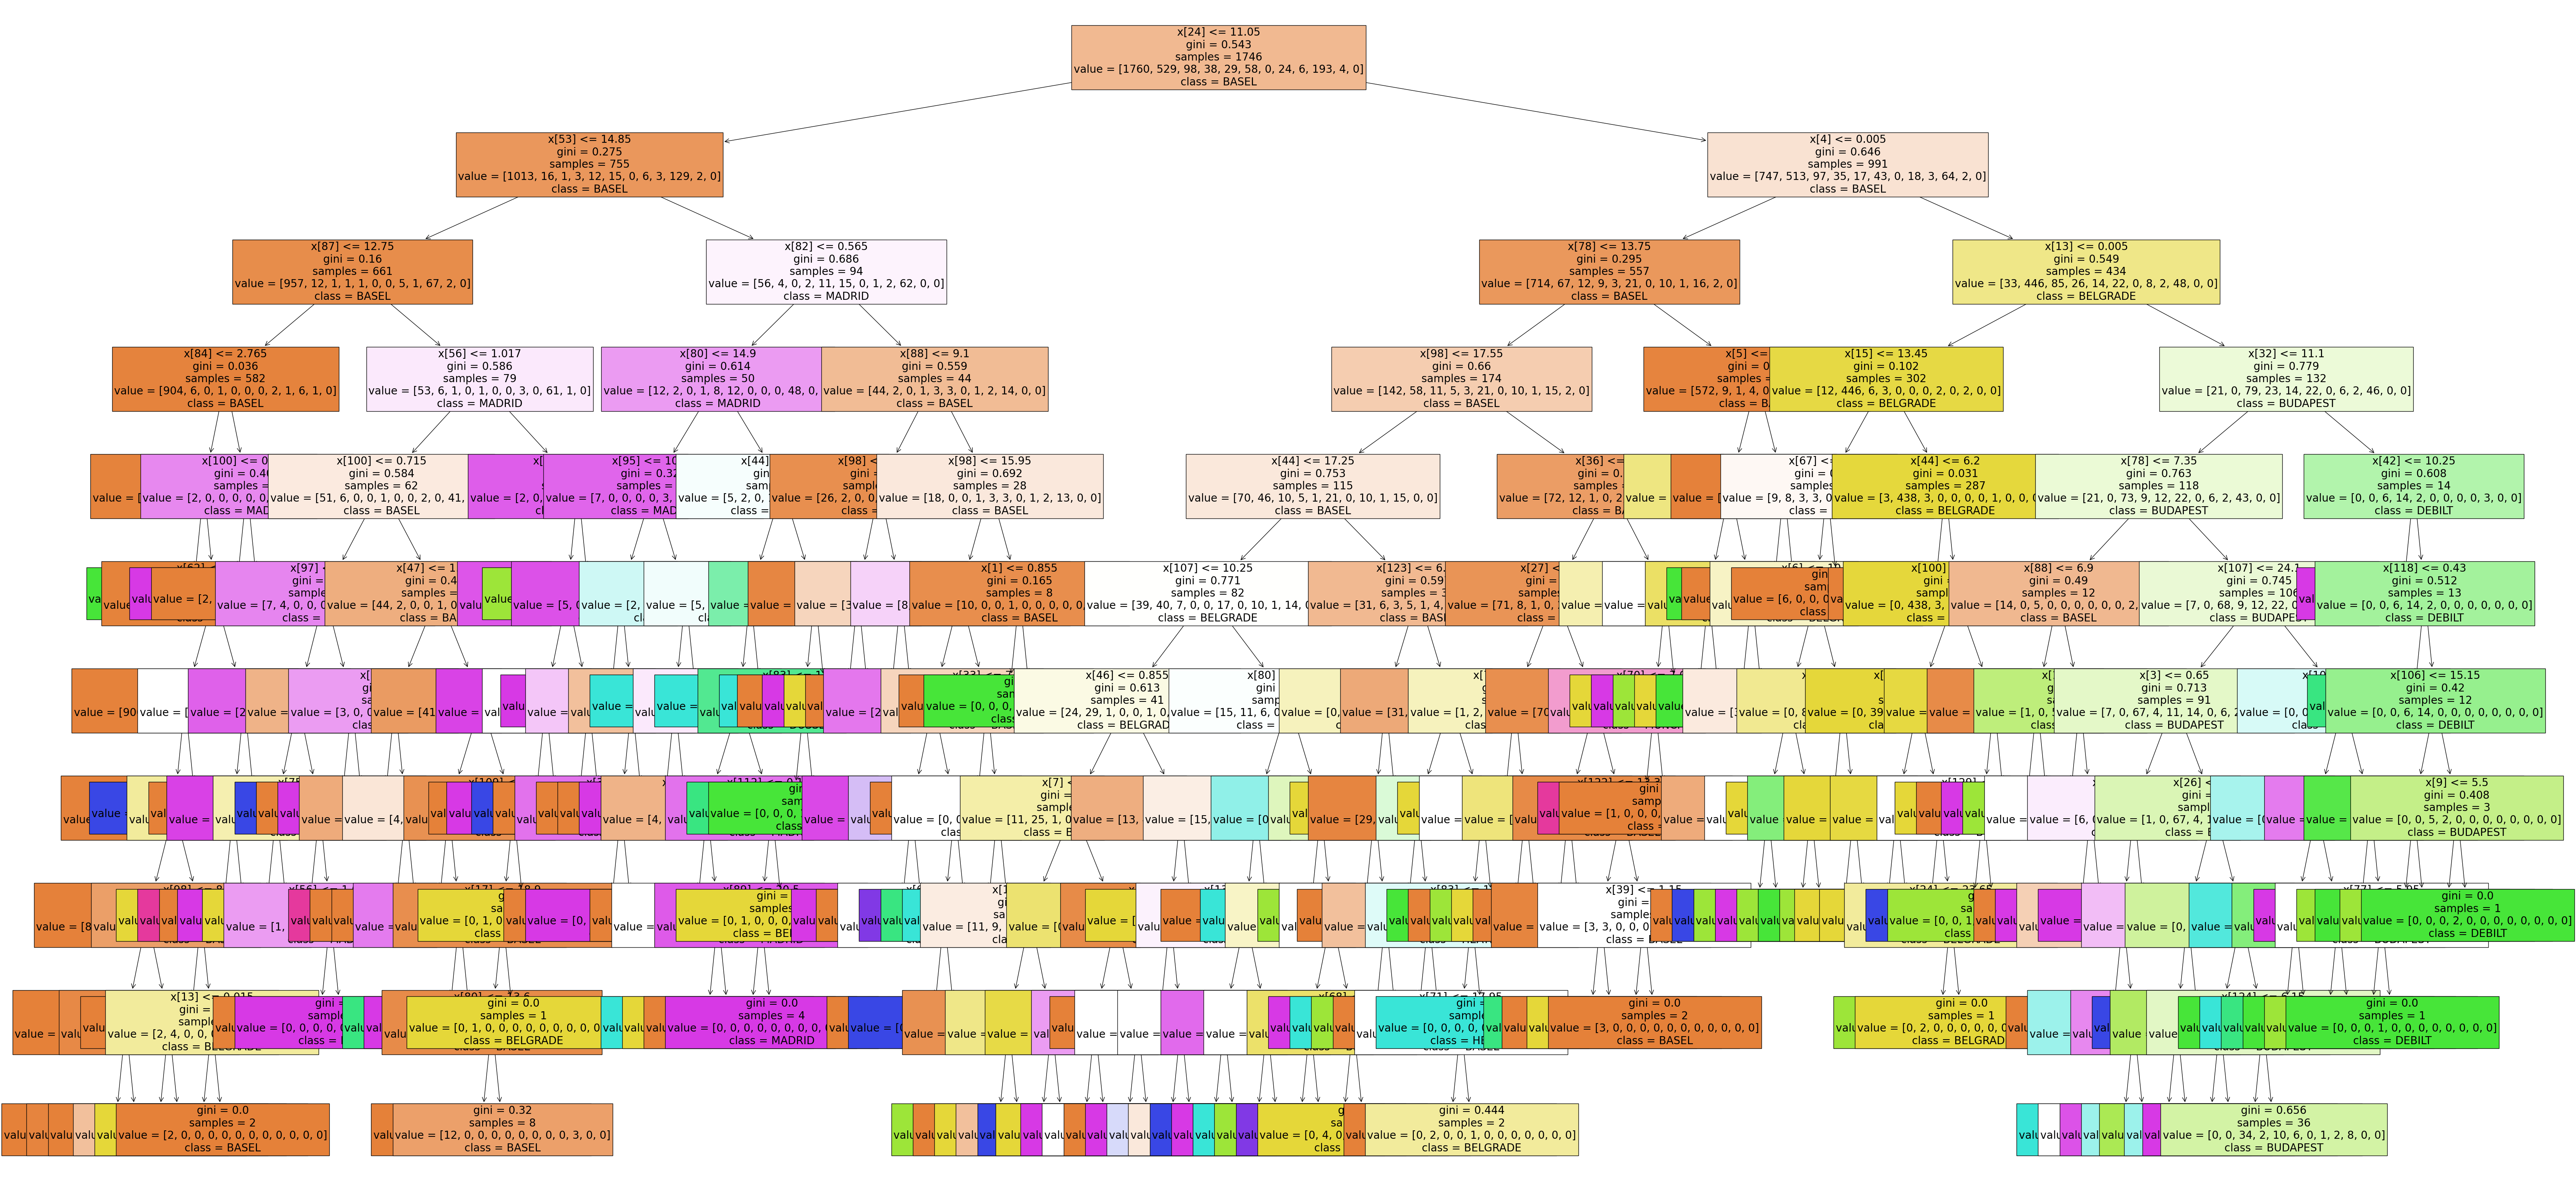

In [47]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=stations, filled=True);

In [39]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Predict on training data (optional, for checking how well the model fits the training set)
y_pred_train = clf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# Predict on test data (this is the main evaluation)
y_pred_test = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# If you're calculating precision, recall, and F1 scores, use y_pred_test
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test, average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
f1 = f1_score(y_test, y_pred_test, average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Train Accuracy: 0.9989047097480832
Test Accuracy: 0.8838992332968236
Precision: 0.8838992332968236
Recall: 0.8838992332968236
F1 Score: 0.8838992332968236


#### 4. Importance based on Signals

In [50]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01880165, 0.01334401, 0.00807965, 0.00949931, 0.105018  ,
       0.02343572, 0.01436582, 0.0076653 , 0.02639893, 0.01221176,
       0.00775078, 0.00572829, 0.0050648 , 0.03880809, 0.00562884,
       0.02499167, 0.00759023, 0.03041925, 0.00073811, 0.        ,
       0.        , 0.0016598 , 0.00764143, 0.00161816, 0.01612864,
       0.01032598, 0.02541022, 0.00174394, 0.00265379, 0.00633082,
       0.00446578, 0.00379884, 0.00296915, 0.00547254, 0.0028124 ,
       0.01119759, 0.00190321, 0.0030513 , 0.0116861 , 0.00411686,
       0.00541221, 0.00400963, 0.0090841 , 0.00303565, 0.01030275,
       0.00196417, 0.00384635, 0.00488619, 0.00599954, 0.00167496,
       0.00345643, 0.00790095, 0.00374215, 0.01221701, 0.0017224 ,
       0.00213369, 0.00232551, 0.00167221, 0.00161316, 0.00188389,
       0.00188651, 0.00200222, 0.00206149, 0.00239117, 0.00432873,
       0.00668128, 0.00585626, 0.00299371, 0.00306801, 0.01395928,
       0.00535388, 0.02073856, 0.00225589, 0.00372839, 0.00784

In [52]:
np.set_printoptions(threshold=1000)

In [54]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.01880165, 0.01334401, 0.00807965, 0.00949931, 0.105018  ,
         0.02343572, 0.01436582, 0.0076653 , 0.02639893],
        [0.01221176, 0.00775078, 0.00572829, 0.0050648 , 0.03880809,
         0.00562884, 0.02499167, 0.00759023, 0.03041925],
        [0.00073811, 0.        , 0.        , 0.0016598 , 0.00764143,
         0.00161816, 0.01612864, 0.01032598, 0.02541022],
        [0.00174394, 0.00265379, 0.00633082, 0.00446578, 0.00379884,
         0.00296915, 0.00547254, 0.0028124 , 0.01119759],
        [0.00190321, 0.0030513 , 0.0116861 , 0.00411686, 0.00541221,
         0.00400963, 0.0090841 , 0.00303565, 0.01030275],
        [0.00196417, 0.00384635, 0.00488619, 0.00599954, 0.00167496,
         0.00345643, 0.00790095, 0.00374215, 0.01221701],
        [0.0017224 , 0.00213369, 0.00232551, 0.00167221, 0.00161316,
         0.00188389, 0.00188651, 0.00200222, 0.00206149],
        [0.00239117, 0.00432873, 0.00668128, 0.00585626, 0.00299371,
         0.00306801, 0.01395928, 0.0053538

In [56]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.05429081, 0.06139638, 0.07962949, 0.0749955 , 0.19370686,
       0.07397526, 0.16134997, 0.08110469, 0.21955104])

In [58]:
signals = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"
]

In [60]:
important = pd.Series(sumarray, index = signals) #.sort_values(ascending = False)
important

cloud_cover         0.054291
humidity            0.061396
pressure            0.079629
global_radiation    0.074996
precipitation       0.193707
sunshine            0.073975
temp_mean           0.161350
temp_min            0.081105
temp_max            0.219551
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


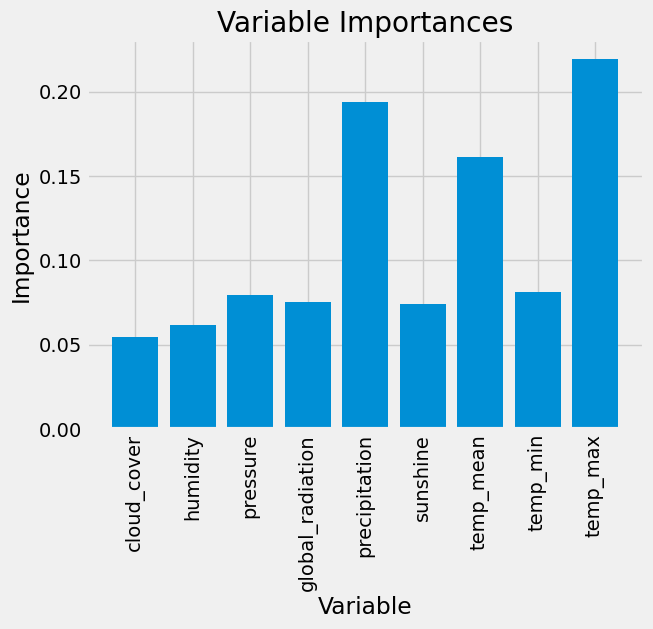

In [62]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, signals, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Importance based on Stations

In [65]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01880165, 0.01334401, 0.00807965, 0.00949931, 0.105018  ,
       0.02343572, 0.01436582, 0.0076653 , 0.02639893, 0.01221176,
       0.00775078, 0.00572829, 0.0050648 , 0.03880809, 0.00562884,
       0.02499167, 0.00759023, 0.03041925, 0.00073811, 0.        ,
       0.        , 0.0016598 , 0.00764143, 0.00161816, 0.01612864,
       0.01032598, 0.02541022, 0.00174394, 0.00265379, 0.00633082,
       0.00446578, 0.00379884, 0.00296915, 0.00547254, 0.0028124 ,
       0.01119759, 0.00190321, 0.0030513 , 0.0116861 , 0.00411686,
       0.00541221, 0.00400963, 0.0090841 , 0.00303565, 0.01030275,
       0.00196417, 0.00384635, 0.00488619, 0.00599954, 0.00167496,
       0.00345643, 0.00790095, 0.00374215, 0.01221701, 0.0017224 ,
       0.00213369, 0.00232551, 0.00167221, 0.00161316, 0.00188389,
       0.00188651, 0.00200222, 0.00206149, 0.00239117, 0.00432873,
       0.00668128, 0.00585626, 0.00299371, 0.00306801, 0.01395928,
       0.00535388, 0.02073856, 0.00225589, 0.00372839, 0.00784

In [67]:
np.set_printoptions(threshold=1000)

In [69]:
newarray = newarray.reshape(-1,9,15)
print(newarray.shape)
newarray

(1, 9, 15)


array([[[0.01880165, 0.01334401, 0.00807965, 0.00949931, 0.105018  ,
         0.02343572, 0.01436582, 0.0076653 , 0.02639893, 0.01221176,
         0.00775078, 0.00572829, 0.0050648 , 0.03880809, 0.00562884],
        [0.02499167, 0.00759023, 0.03041925, 0.00073811, 0.        ,
         0.        , 0.0016598 , 0.00764143, 0.00161816, 0.01612864,
         0.01032598, 0.02541022, 0.00174394, 0.00265379, 0.00633082],
        [0.00446578, 0.00379884, 0.00296915, 0.00547254, 0.0028124 ,
         0.01119759, 0.00190321, 0.0030513 , 0.0116861 , 0.00411686,
         0.00541221, 0.00400963, 0.0090841 , 0.00303565, 0.01030275],
        [0.00196417, 0.00384635, 0.00488619, 0.00599954, 0.00167496,
         0.00345643, 0.00790095, 0.00374215, 0.01221701, 0.0017224 ,
         0.00213369, 0.00232551, 0.00167221, 0.00161316, 0.00188389],
        [0.00188651, 0.00200222, 0.00206149, 0.00239117, 0.00432873,
         0.00668128, 0.00585626, 0.00299371, 0.00306801, 0.01395928,
         0.00535388, 0.0207385

In [71]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.0690401 , 0.04721083, 0.0710816 , 0.04751802, 0.13515493,
       0.08168865, 0.05335134, 0.04724045, 0.07279339, 0.07114781,
       0.04403944, 0.07729302, 0.04957901, 0.06256229, 0.07029913])

In [73]:
important = pd.Series(sumarray, index = stations) #.sort_values(ascending = False)
important

BASEL         0.069040
BELGRADE      0.047211
BUDAPEST      0.071082
DEBILT        0.047518
DUSSELDORF    0.135155
HEATHROW      0.081689
KASSEL        0.053351
LJUBLJANA     0.047240
MAASTRICHT    0.072793
MADRID        0.071148
MUNCHENB      0.044039
OSLO          0.077293
SONNBLICK     0.049579
STOCKHOLM     0.062562
VALENTIA      0.070299
dtype: float64

In [75]:
# Define list of stations names

stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'

}

{0: 'BASEL', 1: 'BELGRADE', 2: 'BUDAPEST', 3: 'DEBILT', 4: 'DUSSELDORF', 5: 'HEATHROW', 6: 'KASSEL', 7: 'LJUBLJANA', 8: 'MAASTRICHT', 9: 'MADRID', 10: 'MUNCHENB', 11: 'OSLO', 12: 'SONNBLICK', 13: 'STOCKHOLM', 14: 'VALENTIA'}


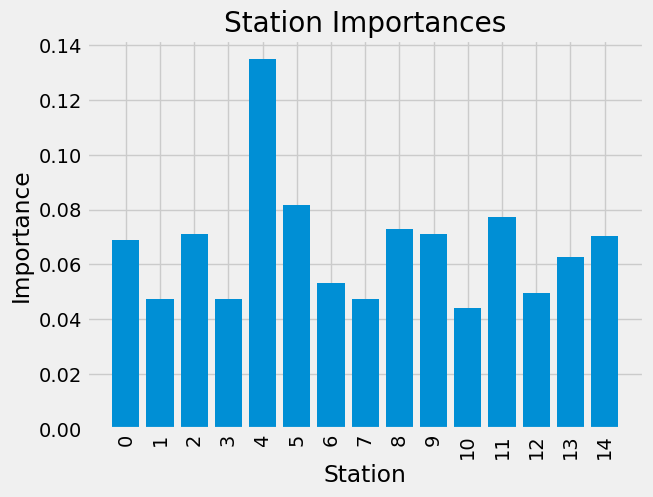

In [77]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Station'); plt.title('Station Importances');

## Optimizing Random Forest

#### Grid Search

In [80]:
# creating a RF classifier
clf = RandomForestClassifier()

In [82]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [84]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.639 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.640 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.639 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.639 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.639 total time=   0.2s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.639 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/sit

Search took 0.6075000127156576 minutes


In [86]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.8528660094925155


#### Random Search

In [90]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [92]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [94]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.639 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.639 total time=   0.2s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.639 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.643 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.639 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_sp

In [96]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 310}
Best RANDOM search score is: 0.8484848484848485


In [98]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.8528660094925155
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 310}
Best RANDOM search score is: 0.8484848484848485


In [43]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=7, min_samples_split=3,
                       n_estimators=200)

In [110]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8696604600219058


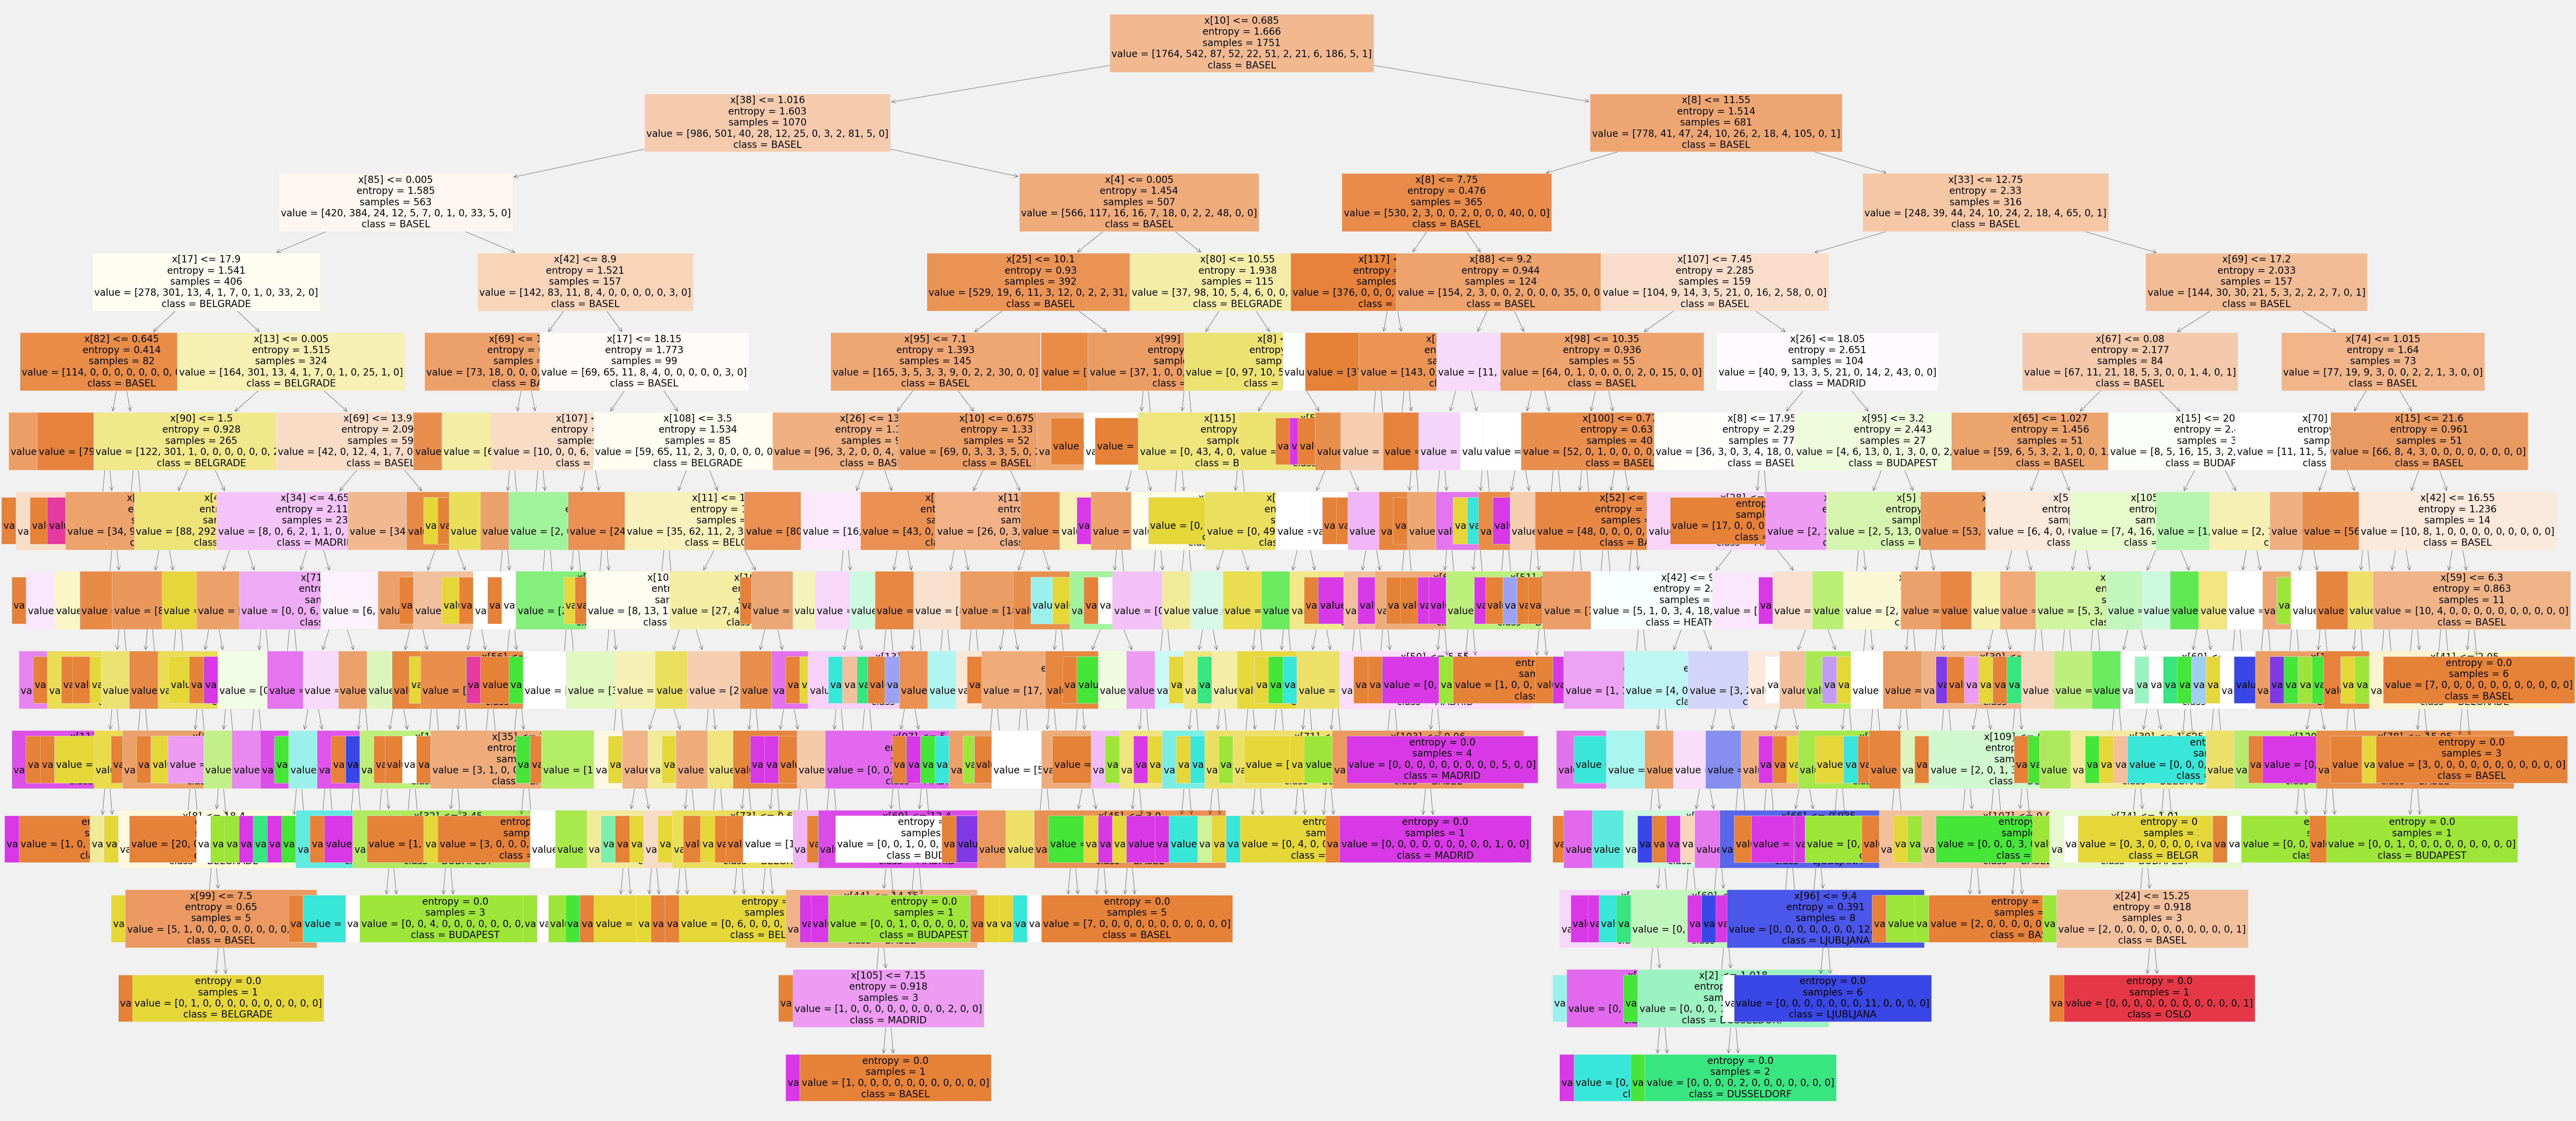

In [116]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=stations, filled=True);

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Predict on training data (optional, for checking how well the model fits the training set)
y_pred_train = clf3.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# Predict on test data (this is the main evaluation)
y_pred_test = clf3.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# If you're calculating precision, recall, and F1 scores, use y_pred_test
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test, average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
f1 = f1_score(y_test, y_pred_test, average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Train Accuracy: 1.0
Test Accuracy: 0.8619934282584885
Precision: 0.8619934282584885
Recall: 0.8619934282584885
F1 Score: 0.8619934282584885
